      Population  Children  Age    Income  Outage_sec_perweek  \
0             38         0   68  28561.99            7.978323   
1          10446         1   27  21704.77           11.699080   
2           3735         4   50   9609.57           10.752800   
3          13863         1   48  18925.23           14.913540   
4          11352         0   83  40074.19            8.147417   
...          ...       ...  ...       ...                 ...   
9994         210         1   46  56384.35            5.905487   
9995         640         3   23  55723.74            9.415935   
9997         406         1   48  45983.43            6.590911   
9998       35575         1   39  16667.58           12.071910   
9999       12230         1   28   9020.92           11.754720   

      Yearly_equip_failure     Tenure  MonthlyCharge  Bandwidth_GB_Year  
0                        1   6.795513     172.455519         904.536110  
1                        1   1.156681     242.632554         800.982766

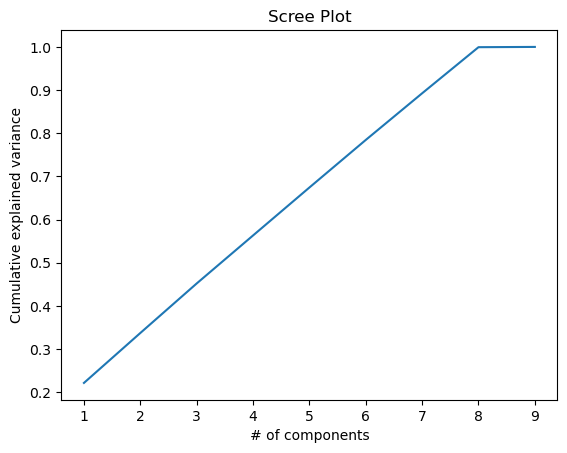

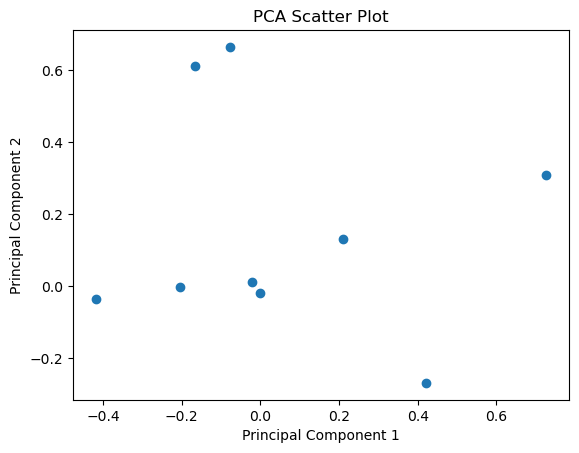

               Variable       PC1       PC2
1              Children  0.011540  0.610057
2                   Age -0.000644 -0.550262
4    Outage_sec_perweek  0.008630  0.402292
5  Yearly_equip_failure  0.010610  0.336418
0            Population -0.020406 -0.165993
3                Income  0.003239  0.146114
6                Tenure  0.705399 -0.029090
7         MonthlyCharge  0.042843 -0.016113
8     Bandwidth_GB_Year  0.706986  0.004122
Variance of PC1: 0.22156492838127034
Variance of PC2: 0.11564276439923317
Variance of PC3: 0.1147355087291991
Variance of PC4: 0.11123510855159402
Variance of PC5: 0.11111766724488543
Variance of PC6: 0.1101939752932119
Variance of PC7: 0.1080790241594593
Variance of PC8: 0.10682209922655825
Variance of PC9: 0.0006089240145883452

Total variance captured:  1.0


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Read the data into a DataFrame
data = pd.read_csv('churn_clean.csv')

# Create a subset of numerical columns for PCA analysis
numerical_columns = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
                     'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']

# Create a new DataFrame with only the numerical columns
numerical_data = data[numerical_columns]

# Calculate z-scores for each numerical column
z_scores = (numerical_data - numerical_data.mean()) / numerical_data.std()

# Remove outliers by filtering based on z-score threshold (e.g., ±3)
z_score_threshold = 3
outlier_removed_data = numerical_data[(z_scores.abs() < z_score_threshold).all(axis=1)]

# Drop rows with null values
outlier_removed_data = outlier_removed_data.dropna()

# Display the cleaned dataset without outliers and null values
print(outlier_removed_data)

# Standardize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(outlier_removed_data)

scaler.fit(normalized_data)
normalized_data = scaler.transform(normalized_data)

# Perform PCA on the normalized data
pca = PCA()
pca.fit(normalized_data)

# Get the principal components
principal_components = pca.components_

# Display the principal components
print("Principal Components:")
print(principal_components)

# Extract the first two principal components
pc1 = [component[0] for component in principal_components]
pc2 = [component[1] for component in principal_components]

# Scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')
plt.title('Scree Plot')
plt.show()

# Create the scatter plot
plt.scatter(pc1, pc2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

# Get the loadings of PC1 and PC2
loadings_pc1 = pca.components_[0]
loadings_pc2 = pca.components_[1]

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame({'Variable': numerical_columns, 'PC1': loadings_pc1, 'PC2': loadings_pc2})

# Sort the DataFrame by the absolute values of loadings for PC1
loadings_df['PC1_abs'] = loadings_df['PC1'].abs()
loadings_df = loadings_df.sort_values(by='PC1_abs', ascending=False)

# Sort the DataFrame by the absolute values of loadings for PC2
loadings_df['PC2_abs'] = loadings_df['PC2'].abs()
loadings_df = loadings_df.sort_values(by='PC2_abs', ascending=False)

# Display the loadings for PC1 and PC2
print(loadings_df[['Variable', 'PC1', 'PC2']])

# Get the explained variance ratio of each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Display the variance of each principal component
for i, var in enumerate(explained_variance_ratio):
    print(f"Variance of PC{i+1}: {var}")

# Calculate the total variance captured
total_variance_captured = sum(explained_variance_ratio)

# Display the total variance captured
print("\nTotal variance captured: ", total_variance_captured)

outlier_removed_data.to_csv('D212_p2_cleaned_churn_data.csv', index=False)

In [2]:
# Get the eigenvalues
eigenvalues = pca.explained_variance_

# Display the eigenvalues
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue of PC{i+1}: {eigenvalue}")

Eigenvalue of PC1: 1.9942977634318
Eigenvalue of PC2: 1.0408962649612055
Eigenvalue of PC3: 1.0327300900759084
Eigenvalue of PC4: 1.0012231169447574
Eigenvalue of PC5: 1.0001660320666832
Eigenvalue of PC6: 0.9918519148154522
Eigenvalue of PC7: 0.9728153175226159
Eigenvalue of PC8: 0.961501782475351
Eigenvalue of PC9: 0.00548090263773039
